### Examples of fractal generation and colouring

In [7]:
import os
import numpy as np
import imageio # Only required for generating the gif
from fractal_generator import FractalGenerator

In [8]:
# Define the folder for outputting fractal images
output_dir = "images"
gif_dir = "gifs"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
if not os.path.exists(gif_dir):
    os.makedirs(gif_dir)

My implementation defines a FractalGenerator object. Generating the fractal involves the following steps:

- First we define the location and resolution of our grid and the threshold for iterations
- Next we generate the mandelbrot set using tensorflow
- Now we colour in our grid according to a set of colour ratios

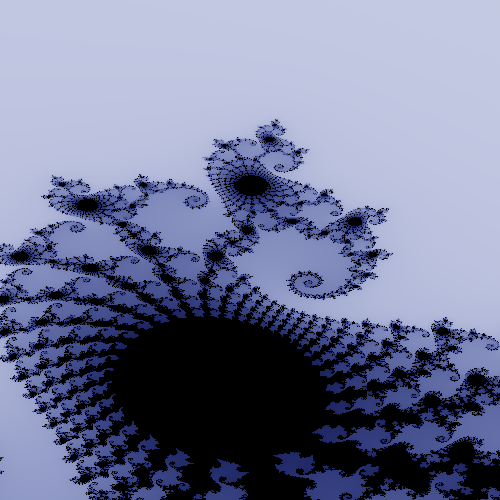

In [9]:
# Define our spatial reference
start_y = -0.751 
end_y = -0.746
start_x = 0.099
end_x = 0.102
# Define the x, y resolution in pixels
res_x = 500
res_y = 500
# Use a threshold of 4 for iteraction and colouring
threshold = 4
# Define the colour ratios
r1, r2, r3 = 0.9, 0.8, 0.4
m = FractalGenerator()
m.set_grid(start_x, end_x, start_y, end_y, res_x, res_y, threshold)
m.generate_mandelbrot(iterations=200)
# Can also change the background colour - I'll leave it as the default (black) 
# m.background = (1, 1, 1)
# Get our coloured grid
m.get_coloured_grid(r1, r2, r3)

Find a different area of the fractal

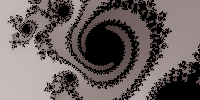

In [10]:
start_y = -0.087
end_y = -0.086
start_x = 0.6545
end_x = 0.6565
res_x = 200
res_y = 100
r1, r2, r3 = 0.5, 0.6, 0.6
m = FractalGenerator()
m.set_grid(start_x, end_x, 
           start_y, end_y, 
           res_x, res_y, threshold=4)
m.generate_mandelbrot(iterations=200)
m.get_coloured_grid(r1, r2, r3)

Or colour the same fractal differently without regenerating

In [ ]:
start_x = -0.753  # x range
end_x = -0.747
start_y = 0.099  # y range
end_y = 0.102
res_x = 200
res_y = 100
r1, r2, r3 = 0.1, 0.1, 0.3
m = FractalGenerator()
m.set_grid(start_x, end_x, 
           start_y, end_y, 
           res_x, res_y, threshold=4)
m.generate_mandelbrot(iterations=200)
m.get_coloured_grid(r1, r2, r3)

Create a larger image and save it to the output folder

In [12]:
m = FractalGenerator()
m.set_grid(start_x = 0.6555, end_x = 0.6535, start_y = -0.086, end_y = -0.087,
           resolution_x=1920, resolution_y=1080, threshold=4)
m.generate_mandelbrot(230)
im = m.get_coloured_grid(0.5, 0.4, 0.2)
im.save(os.path.join(output_dir, "mandelbrot_1.png"))

# The classic mandelbrot image

We can produce the classic mandelbrot set image by exploring a larger range.

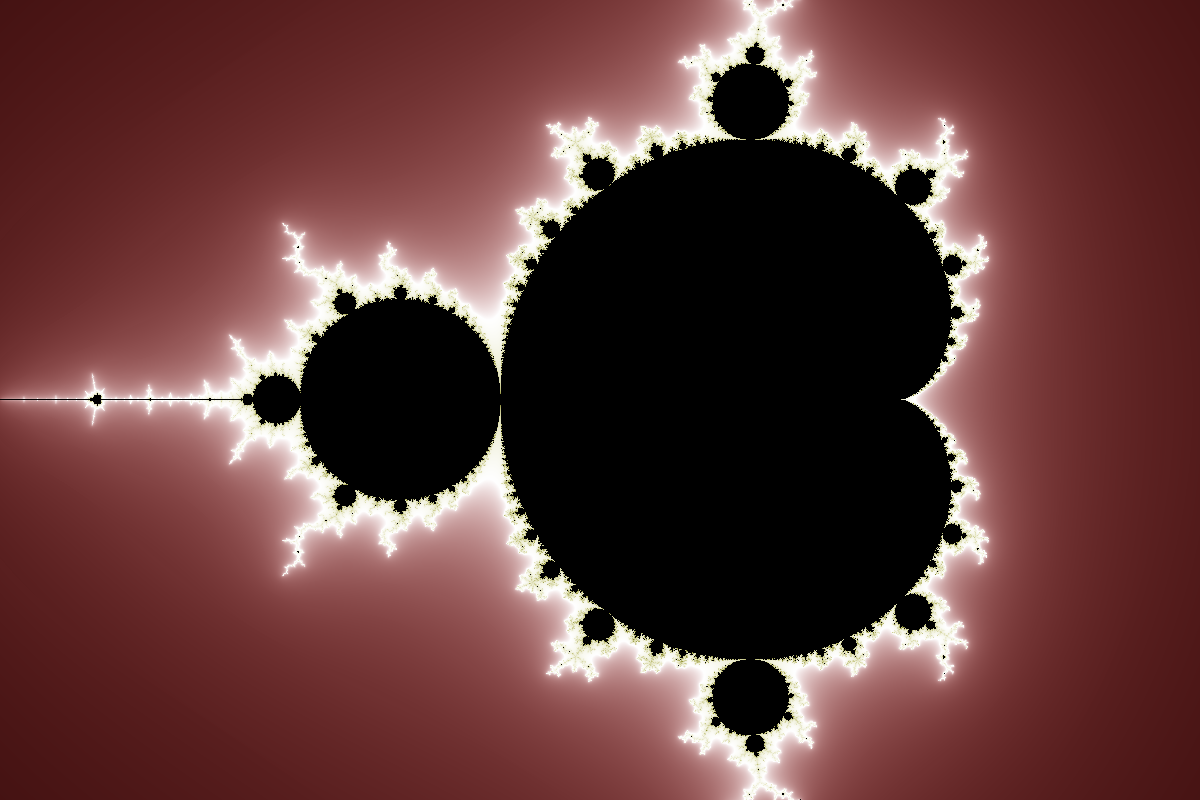

In [13]:
r1, r2, r3 = 0.2, 0.2, 0.5
m2 = FractalGenerator()
m2.set_grid(start_x=-1, end_x=1, start_y=-2, end_y=1, resolution_x=800, resolution_y=1200, threshold=4)
m2.generate_mandelbrot(iterations=230)
im = m2.get_coloured_grid(r1, r2, r3, 1.5, 3, 3)
im = im.rotate(90, expand=1)
im.save(os.path.join(output_dir, "mandelbrot_classic.png"))
im

# Julia set generation

The related julia set can also be generated in the same fashion. Using a conversion to polar coordinates, we can achieve periodicity in the Julia set - useful for generating an animation.

First let's just generate the famous Julia set image.

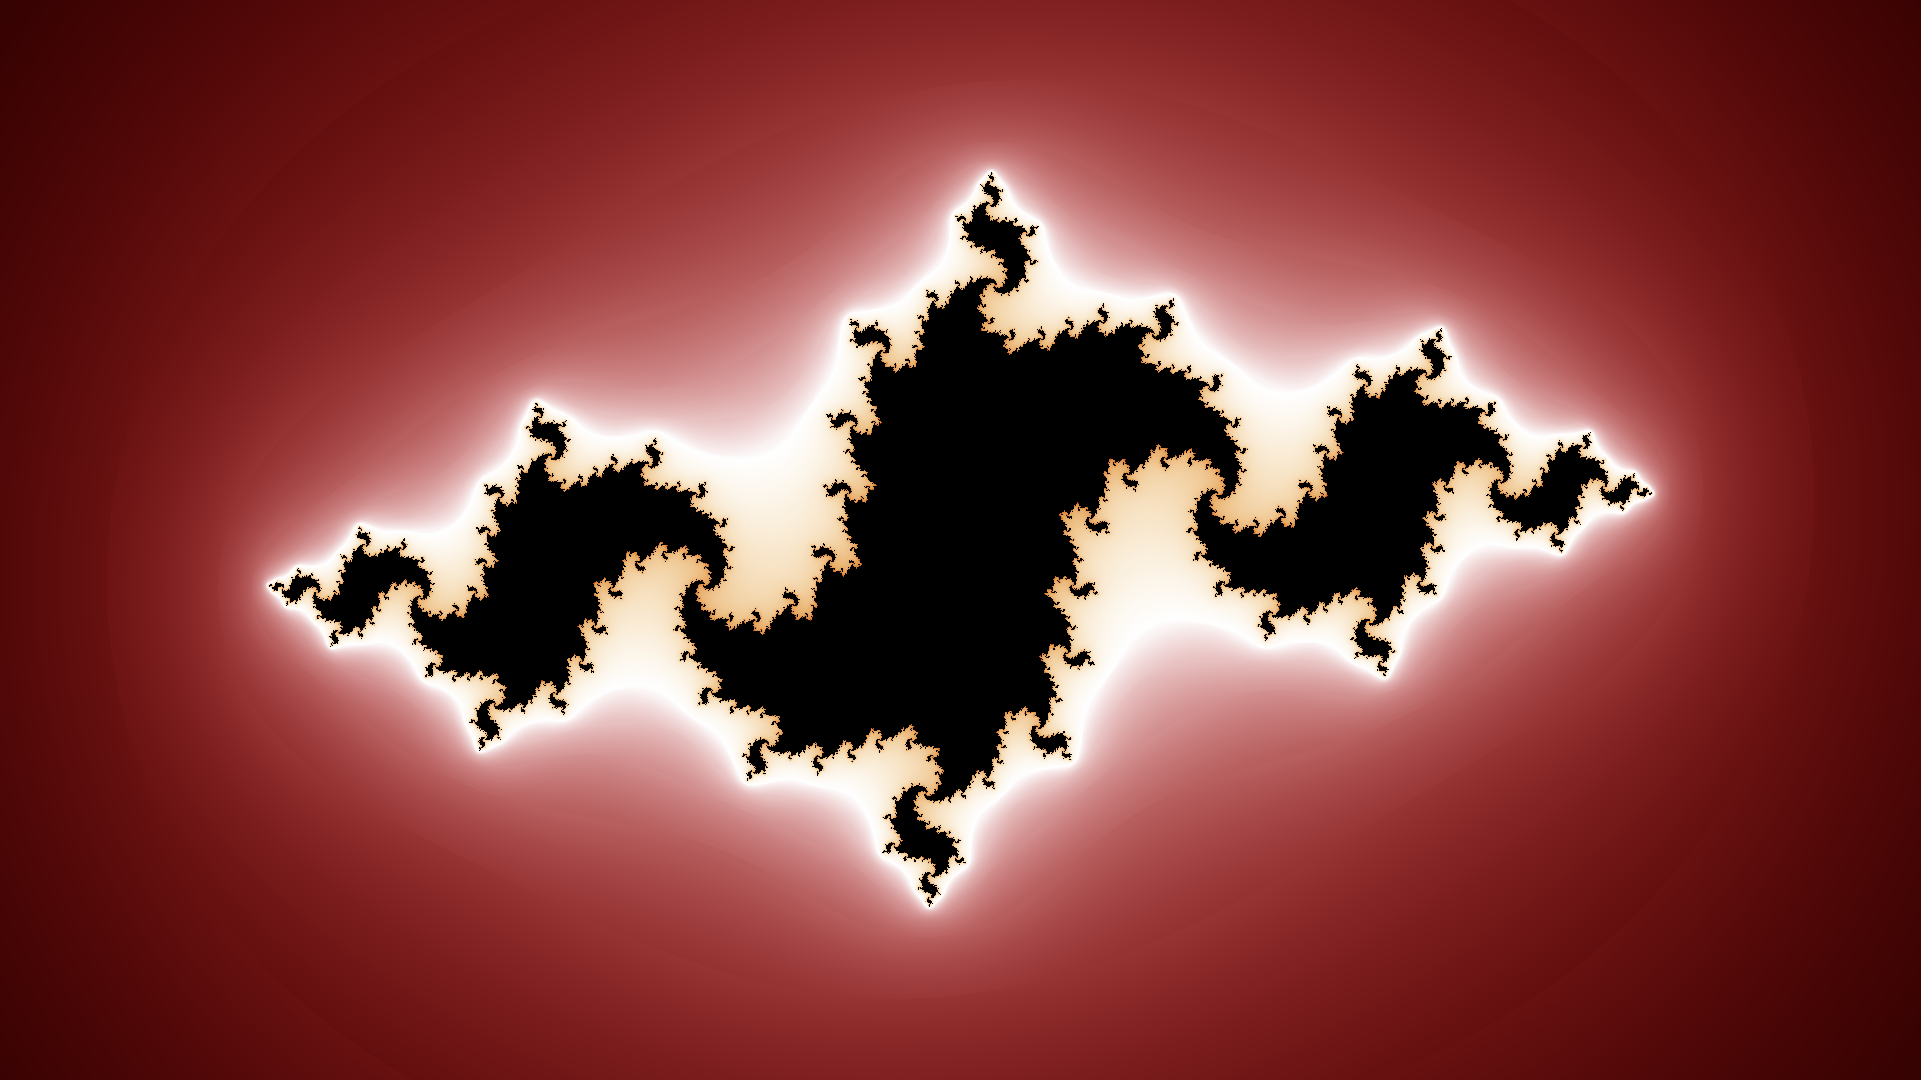

In [14]:
m = FractalGenerator()
m.set_grid(start_x=-1.2, end_x=1.2,
               start_y=-2.2, end_y=2.2,
               resolution_x=1080, resolution_y=1920,
               threshold=2.9)
theta = 1.1*np.pi
c = -(0.83 - 0.1 * np.cos(theta)) - (0.25 + 0.1 * np.sin(theta)) * 1j
m.generate_julia(iterations=300, c=c)
r1, r2, r3 = 0.1, 0.4, 0.9
im = m.get_coloured_grid(r1, r2, r3, b1=1, b2=3, b3=3)
im = im.rotate(90, expand=1)
im.save(os.path.join(output_dir, "julia_red_1.png"))
im

Now generate a whole set of images, modifying the value of c each time using the periodic nature of the algorthim, and stitch the images together into a gif.

In [15]:
# define the number of frames to generate and the total time taken
total_frames = 200 # Make this smaller if you don't want it to take so long!
total_time = 10
images = []
for i in range(0, total_frames, 1):
    m = FractalGenerator()
    m.set_grid(start_x=-1.2, end_x=1.2,
               start_y=-2.2, end_y=2.2,
               resolution_x=1080, resolution_y=1920,
               threshold=2.9)
    # Use the periodicity in c to generate a looping gif
    theta = 2 * i * np.pi / total_frames
    c = -(0.83 - 0.1 * np.cos(theta)) - (0.25 + 0.1 * np.sin(theta)) * 1j
    m.generate_julia(iterations=300, c=c)
    r1, r2, r3 = 0.1, 0.4, 0.9
    im = m.get_coloured_grid(r1, r2, r3, b1=1, b2=3, b3=3)
    im = im.rotate(90, expand=1)
    images.append(np.array(im))
# Write out our gif
imageio.mimsave(os.path.join(gif_dir, "julia_red.gif"), images,'GIF',
                duration=total_time/total_frames)

KeyboardInterrupt: 